In [22]:
def loadimgs(path):
    '''
    path => Path of train directory or test directory
    '''
    lang_dict = {}
    current_array = []
    # we load every alphabet seperately so we can isolate them later
    for alphabet in os.listdir(path):
        current_array = []
        print("loading alphabet: " + alphabet)
        alphabet_path = os.path.join(path,alphabet)
        # every letter/category has it's own column in the array, so  load seperately
        for letter in os.listdir(alphabet_path):
            letter_path = os.path.join(alphabet_path, letter)
            example_path = os.path.join(letter_path,os.listdir(letter_path)[0])
            current_array.append(imread(example_path,1));
        lang_dict[alphabet] = np.array(current_array);
        
    return lang_dict

In [1]:
import sys
import numpy as np
import pandas as pd
from scipy.misc import imread
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng
import imageio
from skimage import io
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [24]:
train_folder = "D:\_Python\JupyterProjects/images_background/images_background/"
val_folder = 'D:\_Python\JupyterProjects/images_evaluation/images_evaluation/'
save_path = 'D:\_Python\JupyterProjects/data/'

In [25]:
lang_dic=loadimgs(train_folder)

loading alphabet: Alphabet_of_the_Magi
loading alphabet: Anglo-Saxon_Futhorc
loading alphabet: Arcadian
loading alphabet: Armenian
loading alphabet: Asomtavruli_(Georgian)
loading alphabet: Balinese
loading alphabet: Bengali
loading alphabet: Blackfoot_(Canadian_Aboriginal_Syllabics)


D:\_Python\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


loading alphabet: Braille
loading alphabet: Burmese_(Myanmar)
loading alphabet: Cyrillic
loading alphabet: Early_Aramaic
loading alphabet: Futurama
loading alphabet: Grantha
loading alphabet: Greek
loading alphabet: Gujarati
loading alphabet: Hebrew
loading alphabet: Inuktitut_(Canadian_Aboriginal_Syllabics)
loading alphabet: Japanese_(hiragana)
loading alphabet: Japanese_(katakana)
loading alphabet: Korean
loading alphabet: Latin
loading alphabet: Malay_(Jawi_-_Arabic)
loading alphabet: Mkhedruli_(Georgian)
loading alphabet: N_Ko
loading alphabet: Ojibwe_(Canadian_Aboriginal_Syllabics)
loading alphabet: Sanskrit
loading alphabet: Syriac_(Estrangelo)
loading alphabet: Tagalog
loading alphabet: Tifinagh


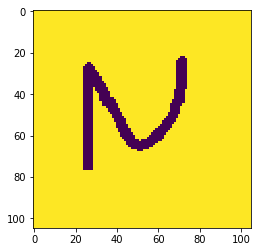

In [5]:
plt.imshow(img_dic['N_Ko'][4])

In [27]:
with open("lang_dic.pickle","wb") as f:
    pickle.dump(lang_dic,f)
    
    

In [6]:
path = os.getcwd()
path

'D:\\_BigFatProjects\\ScribbleGraphy\\Python'

In [2]:
with open("lang_dic.pickle","rb") as f:
    img_dic = pickle.load(f)
    

TypeError: Image data cannot be converted to float

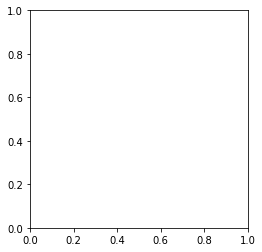

In [8]:
test_img = img_dic['N_Ko'][4].resize(1,105,105,1)
plt.imshow(test_img)